
Training for 5 epochs:
Epoch 1/5, Train Loss: 0.5959, Test Loss: 0.3712, Train Acc: 78.64%, Test Acc: 86.18%
Epoch 2/5, Train Loss: 0.3858, Test Loss: 0.3138, Train Acc: 86.17%, Test Acc: 88.37%
Epoch 3/5, Train Loss: 0.3319, Test Loss: 0.2898, Train Acc: 88.03%, Test Acc: 89.35%
Epoch 4/5, Train Loss: 0.2985, Test Loss: 0.2701, Train Acc: 89.38%, Test Acc: 90.27%
Epoch 5/5, Train Loss: 0.2764, Test Loss: 0.2562, Train Acc: 90.12%, Test Acc: 90.59%


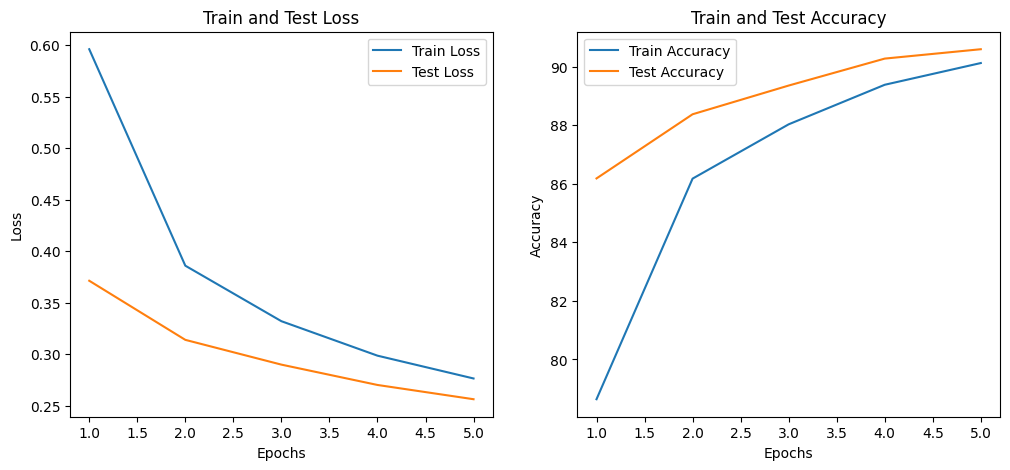


Training for 10 epochs:
Epoch 1/10, Train Loss: 0.6074, Test Loss: 0.3739, Train Acc: 78.36%, Test Acc: 86.26%
Epoch 2/10, Train Loss: 0.3942, Test Loss: 0.3200, Train Acc: 85.97%, Test Acc: 88.21%
Epoch 3/10, Train Loss: 0.3414, Test Loss: 0.2900, Train Acc: 87.86%, Test Acc: 89.35%
Epoch 4/10, Train Loss: 0.3103, Test Loss: 0.2723, Train Acc: 88.87%, Test Acc: 90.03%
Epoch 5/10, Train Loss: 0.2812, Test Loss: 0.2658, Train Acc: 89.97%, Test Acc: 90.35%
Epoch 6/10, Train Loss: 0.2616, Test Loss: 0.2581, Train Acc: 90.65%, Test Acc: 90.58%
Epoch 7/10, Train Loss: 0.2458, Test Loss: 0.2467, Train Acc: 91.12%, Test Acc: 91.06%
Epoch 8/10, Train Loss: 0.2312, Test Loss: 0.2443, Train Acc: 91.66%, Test Acc: 91.31%
Epoch 9/10, Train Loss: 0.2170, Test Loss: 0.2364, Train Acc: 92.08%, Test Acc: 91.61%
Epoch 10/10, Train Loss: 0.2043, Test Loss: 0.2419, Train Acc: 92.48%, Test Acc: 91.60%


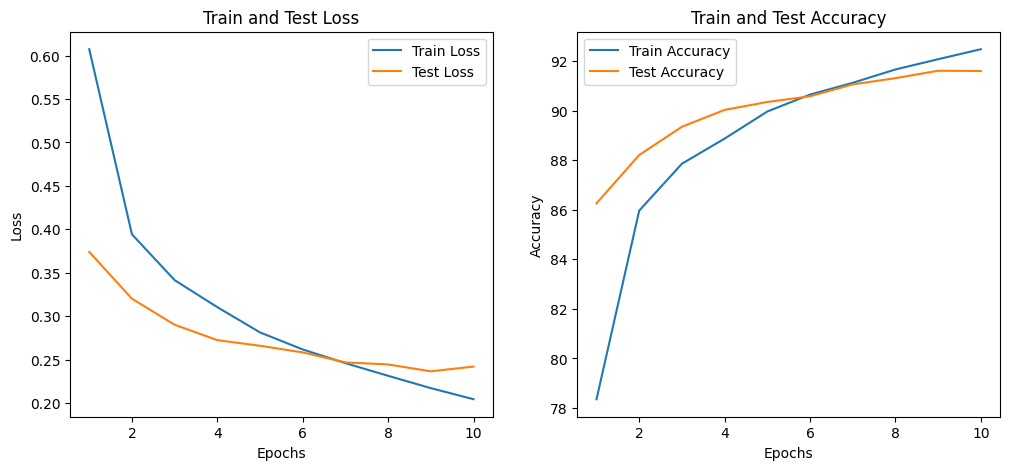


Training for 15 epochs:
Epoch 1/15, Train Loss: 0.6062, Test Loss: 0.3661, Train Acc: 78.05%, Test Acc: 86.67%
Epoch 2/15, Train Loss: 0.3868, Test Loss: 0.3173, Train Acc: 86.22%, Test Acc: 88.31%
Epoch 3/15, Train Loss: 0.3341, Test Loss: 0.2867, Train Acc: 88.08%, Test Acc: 89.48%
Epoch 4/15, Train Loss: 0.3005, Test Loss: 0.2656, Train Acc: 89.19%, Test Acc: 90.23%
Epoch 5/15, Train Loss: 0.2709, Test Loss: 0.2498, Train Acc: 90.34%, Test Acc: 90.94%
Epoch 6/15, Train Loss: 0.2547, Test Loss: 0.2458, Train Acc: 90.86%, Test Acc: 90.87%
Epoch 7/15, Train Loss: 0.2337, Test Loss: 0.2365, Train Acc: 91.39%, Test Acc: 91.26%
Epoch 8/15, Train Loss: 0.2213, Test Loss: 0.2319, Train Acc: 91.93%, Test Acc: 91.55%
Epoch 9/15, Train Loss: 0.2095, Test Loss: 0.2279, Train Acc: 92.37%, Test Acc: 91.53%
Epoch 10/15, Train Loss: 0.1963, Test Loss: 0.2327, Train Acc: 92.84%, Test Acc: 91.45%
Epoch 11/15, Train Loss: 0.1822, Test Loss: 0.2396, Train Acc: 93.21%, Test Acc: 91.75%
Epoch 12/15, Tra

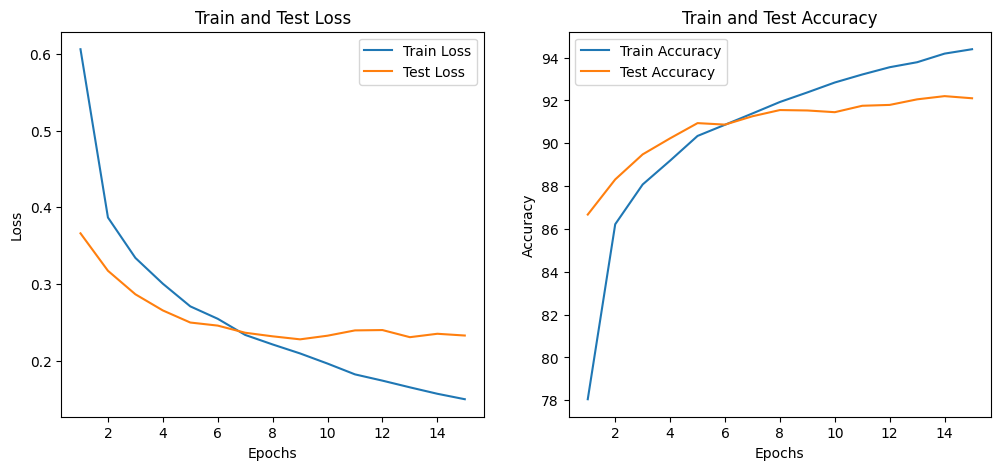

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Transformacje danych
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Ładowanie zbioru danych
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Definicja modelu
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Funkcja treningowa z rejestrowaniem strat i dokładności
def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, epochs):
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(100 * correct_train / total_train)

        # Ewaluacja na zbiorze testowym
        model.eval()
        running_loss = 0.0
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct_test += (predicted == labels).sum().item()
                total_test += labels.size(0)

        test_losses.append(running_loss / len(test_loader))
        test_accuracies.append(100 * correct_test / total_test)

        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, "
              f"Train Acc: {train_accuracies[-1]:.2f}%, Test Acc: {test_accuracies[-1]:.2f}%")

    return train_losses, test_losses, train_accuracies, test_accuracies

# Wizualizacja wyników
def plot_results(train_losses, test_losses, train_accuracies, test_accuracies, epochs):
    epoch_range = range(1, epochs + 1)

    plt.figure(figsize=(12, 5))

    # Strata
    plt.subplot(1, 2, 1)
    plt.plot(epoch_range, train_losses, label='Train Loss')
    plt.plot(epoch_range, test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train and Test Loss')
    plt.legend()

    # Dokładność
    plt.subplot(1, 2, 2)
    plt.plot(epoch_range, train_accuracies, label='Train Accuracy')
    plt.plot(epoch_range, test_accuracies, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train and Test Accuracy')
    plt.legend()

    plt.show()

# Analiza dla różnych liczby epok
epochs_list = [5, 10, 15]
for epochs in epochs_list:
    print(f"\nTraining for {epochs} epochs:")
    model = CNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses, test_losses, train_accuracies, test_accuracies = train_and_evaluate(
        model, train_loader, test_loader, criterion, optimizer, epochs
    )

    plot_results(train_losses, test_losses, train_accuracies, test_accuracies, epochs)
